In [91]:
import gauss_decomp as gdc
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from iris_lmsalpy import extract_irisL2data as ei
from scipy.io import readsav
from iris_lmsalpy import saveall as sv
from scipy.stats import spearmanr
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob

In [92]:
os.environ['path']= '/Users/souvikb/various_analysis/GaussSep/'
os.environ['results_dir'] = '/Users/souvikb/various_analysis/GaussSep/Results/'
os.environ['saved_files'] = '/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/'

In [93]:
b_mag = readsav(os.path.join(os.environ['path'],'bose_codes/bxbybz_29Jul2017_plage.sav'))
b_mag.keys()
Bx0_obs = b_mag['bx2']
By0_obs = b_mag['by2']
Bz0_obs = b_mag['bz2']
Bz0_obs.shape


(512, 866)

In [128]:
### Loading the saved IRIS and SOT arrays
iris_sot_aligned_files = np.load(os.path.join(os.environ['results_dir'],'aligned_iris_sot_upper_chromos.npz'))
# iris_sot_aligned_files = np.load(os.path.join(os.environ['results_dir'],'aligned_iris_sot_mid_chromos.npz')) 
E_density_gt = iris_sot_aligned_files['E_density_gt']
E_density_lt = iris_sot_aligned_files['E_density_lt']
IRL = iris_sot_aligned_files['IRL_IRIS2']
Ne = iris_sot_aligned_files['Ne_IRIS2']
Temp = iris_sot_aligned_files['Temp_IRIS2']
B_z_cropped = iris_sot_aligned_files['B_z_cropped']


/var/folders/ms/lnhrcvqs3z1c4t2zkhv2wt600000gp/T/ipykernel_26404/1889878736.py:11: RuntimeWarning: invalid value encountered in log10
  im=ax[2].imshow(np.log10(Ne), origin='lower', cmap='jet',interpolation='none',vmin=10.5,vmax=12.5)


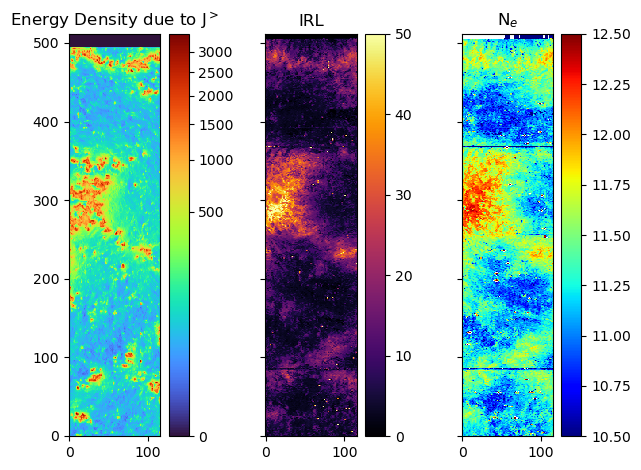

In [129]:
fig, ax = plt.subplots(ncols =3, nrows=1, sharex=True, sharey=True)
ax.ravel()
im = ax[0].imshow(E_density_gt,origin='lower', interpolation='nearest',cmap='turbo',norm=colors.PowerNorm(0.3))
plt.colorbar(im)
ax[0].set_title('Energy Density due to J$^{>}$')

im=ax[1].imshow(IRL,origin='lower', cmap='inferno',vmin=0,vmax=50, interpolation='none')
plt.colorbar(im)
ax[1].set_title(r'IRL')

im=ax[2].imshow(np.log10(Ne), origin='lower', cmap='jet',interpolation='none',vmin=10.5,vmax=12.5)
plt.colorbar(im)
ax[2].set_title(r'N$_{e}$')
fig.tight_layout()

## Starting with Magnetic field mask

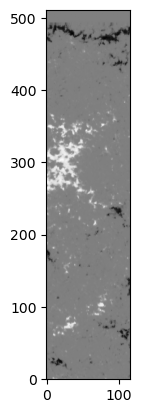

In [96]:
B_thresh1 = 10
B_thresh2 = 100
mask_B = ((np.abs(B_z_cropped) >= B_thresh1) & (np.abs(B_z_cropped) <= B_thresh2)).astype(float)
# mask_B = np.where(np.abs(B_z_cropped) >=B_thresh, 1., 0.)
plt.imshow((B_z_cropped), cmap='gray',origin='lower')
# plt.colorbar()
# plt.contour(mask_B, origin='lower',color='red',levels=[0.5])

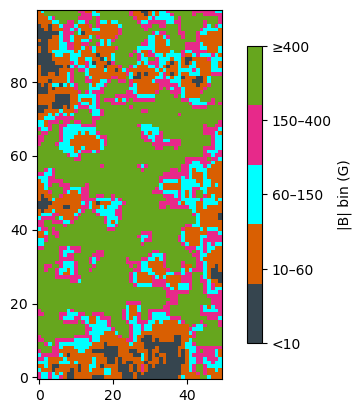

In [114]:
b_bins = [(10, 60), (60, 150), (150, 400), (400, np.round(np.max(np.abs(B_z_cropped))))]
import matplotlib
segment_ids = np.zeros_like(B_z_cropped, dtype=int)
segment_ids[np.where((np.abs(B_z_cropped) <= b_bins[0][0]))] = -1
segment_ids[np.where((np.abs(B_z_cropped) >= b_bins[0][0]) & (np.abs(B_z_cropped) < b_bins[0][1]))] =1
segment_ids[np.where((np.abs(B_z_cropped) >= b_bins[1][0]) & (np.abs(B_z_cropped) < b_bins[1][1]))] =2
segment_ids[np.where((np.abs(B_z_cropped) >= b_bins[2][0]) & (np.abs(B_z_cropped) < b_bins[2][1]))] =3
segment_ids[np.where((np.abs(B_z_cropped) >= b_bins[3][0]) & (np.abs(B_z_cropped) < b_bins[3][1]))] =4
# b_bins[0][0]
# np.where((np.abs(B_z_cropped) >= b_bins[0][0]) & (np.abs(B_z_cropped) < b_bins[0][1]))
# plt.imshow(np.where((np.abs(B_z_cropped) >= b_bins[0][0]) & (np.abs(B_z_cropped) < b_bins[0][1]),1.0, 0),origin='lower')
# colors = ["#FFFFFF", "#d62728", "#2ca02c", "#9467bd", "#ff7f0e"]  # distinct, colorblind-friendly
colors1 = ["#36454F", "#d95f02", "#00FFFF", "#e7298a", "#66a61e"]
cmap = matplotlib.colors.ListedColormap(colors1)

plt.imshow(segment_ids[250:350, 0:50], cmap=cmap, vmin=0, vmax=4, origin='lower', interpolation='none')
cbar = plt.colorbar(ticks=range(5), fraction=0.03)
cbar.ax.set_yticklabels(["<10", "10–60", "60–150", "150–400", "≥400"])
cbar.set_label("|B| bin (G)")
plt.show()


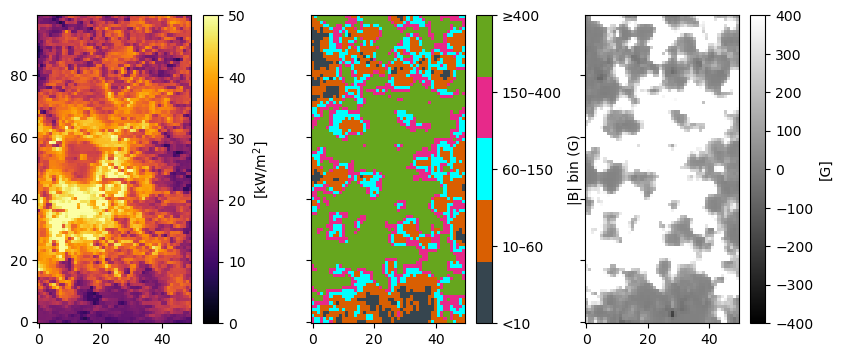

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10,4))
ax=ax.ravel()
im=ax[0].imshow(IRL[250:350, 0:50],origin='lower', cmap='inferno',vmin=0,vmax=50, interpolation='none')
plt.colorbar(im, label=r'[kW/m$^{2}$]',fraction=0.1)

im = ax[1].imshow(segment_ids[250:350, 0:50], cmap=cmap, vmin=0, vmax=4, origin='lower', interpolation='none')
cbar = plt.colorbar(im, ticks=range(5),fraction=0.1)
cbar.ax.set_yticklabels(["<10", "10–60", "60–150", "150–400", "≥400"])
cbar.set_label("|B| bin (G)")

im = ax[2].imshow(B_z_cropped[250:350, 0:50],cmap='gray',vmin=-400,vmax=400,origin='lower')
plt.colorbar(im, label=r'[G]',fraction=0.1)
plt.savefig(os.path.join(os.environ['results_dir'],'Zoom_Magnetic_segmentation_IRL.png'),dpi=300,bbox_inches='tight')

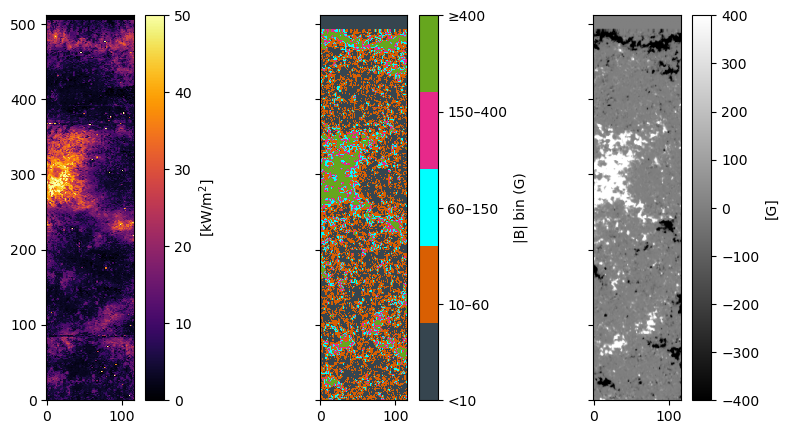

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10,5))
ax=ax.ravel()
im=ax[0].imshow(IRL[:, :],origin='lower', cmap='inferno',vmin=0,vmax=50, interpolation='none')
plt.colorbar(im, label=r'[kW/m$^{2}$]',fraction=0.1)

im = ax[1].imshow(segment_ids, cmap=cmap, vmin=0, vmax=4, origin='lower', interpolation='none')
cbar = plt.colorbar(im, ticks=range(5),fraction=0.1)
cbar.ax.set_yticklabels(["<10", "10–60", "60–150", "150–400", "≥400"])
cbar.set_label("|B| bin (G)")

im = ax[2].imshow(B_z_cropped,cmap='gray',vmin=-400,vmax=400,origin='lower')
plt.colorbar(im, label=r'[G]',fraction=0.1)
plt.savefig(os.path.join(os.environ['results_dir'],'Magnetic_segmentation_IRL.png'),dpi=300,bbox_inches='tight')

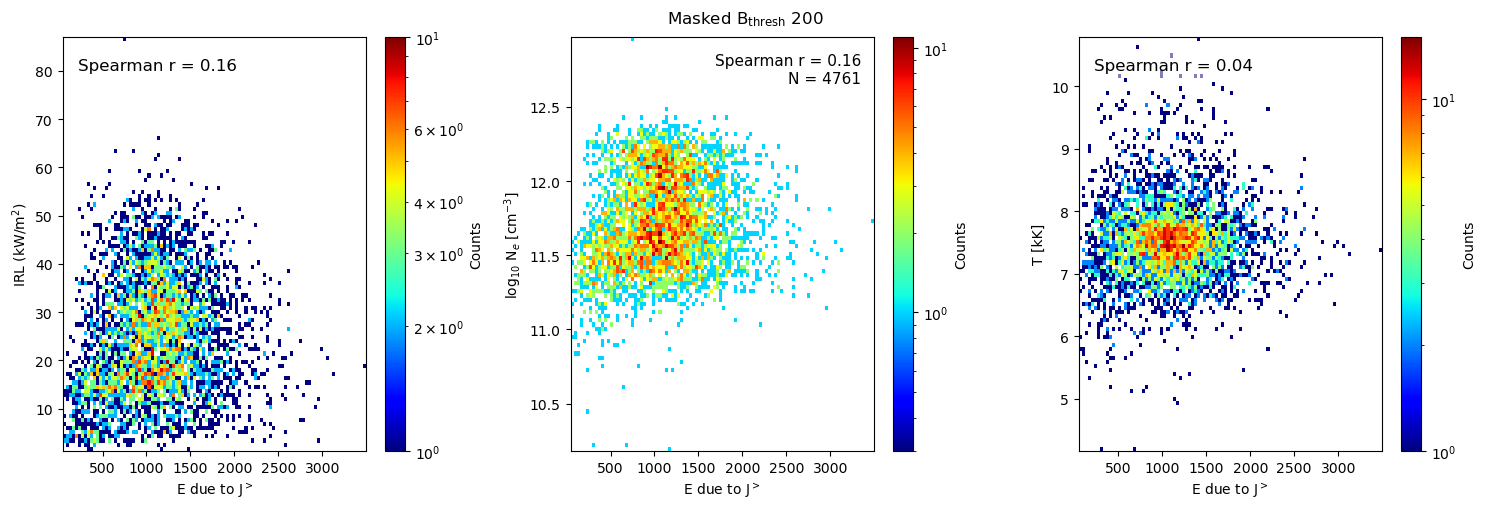

In [166]:
### JPDFs
y_list = [mask_B*IRL, mask_B*Ne, mask_B*Temp]
y_title = [r'IRL (kW/m$^{2}$)', r'log$_{10}$ N$_e$ [cm$^{-3}$]', 'T [kK]']
x = (E_density*mask_B).flatten()

fig, ax = plt.subplots(ncols = len(y_list), nrows=1, figsize=(15,5))
ax.ravel()

for yy in range(len(y_list)):
    y = y_list[yy].flatten()
    mask = (~np.isnan(x)) & (~np.isnan(y)) & (y > 0)
    x_valid = x[mask]
    y_valid = y[mask]
    # Calculate Spearman rank correlation
    if yy == 1:
        rho, pval = spearmanr(x_valid, np.log10(y_valid))
        hist = ax[yy].hist2d(x_valid, np.log10(y_valid), bins=100, cmap='jet', norm=colors.LogNorm(0.3))
        ax[yy].set_ylabel(y_title[yy])
        min_val = max(np.nanmin(x_valid), np.nanmin(np.log10(y_valid)))
        max_val = min(np.nanmax(x_valid), np.nanmax(np.log10(y_valid)))
        # ax[yy].plot([min_val, max_val], [min_val, max_val], 'w--', lw=2, label='y = x', color='red')
        ax[yy].text(
            0.96,
            0.96,
            f"Spearman r = {rho:.2f}\nN = {len(x_valid)}",
            transform=ax[yy].transAxes,
            ha='right',
            va='top',
            fontsize=11,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'),
        )
        fig.colorbar(hist[3], label='Counts')

    else:
        # print('fuck')
        rho, pval = spearmanr(x_valid, (y_valid))
        hist = ax[yy].hist2d(x_valid, (y_valid), bins=100, cmap='jet', norm=colors.LogNorm())
        ax[yy].set_ylabel(y_title[yy])
        min_val = max(np.nanmin(x_valid), np.nanmin(y_valid))
        max_val = min(np.nanmax(x_valid), np.nanmax(y_valid))
        # ax[yy].plot([min_val, max_val], [min_val, max_val], 'w--', lw=2, label='y = x', color='red')
        ax[yy].text(0.05, 0.95, f"Spearman r = {rho:.2f}", transform=ax[yy].transAxes,
                    fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        fig.colorbar(hist[3], label='Counts')

    ax[yy].set_xlabel(r'E due to J$^{>}$')
fig.tight_layout()
plt.suptitle('Masked B$_{\mathrm{thresh}}$ '+format(B_thresh), y=1.01)
plt.show()
    # ax[yy].set_title('2D JPDF')
    




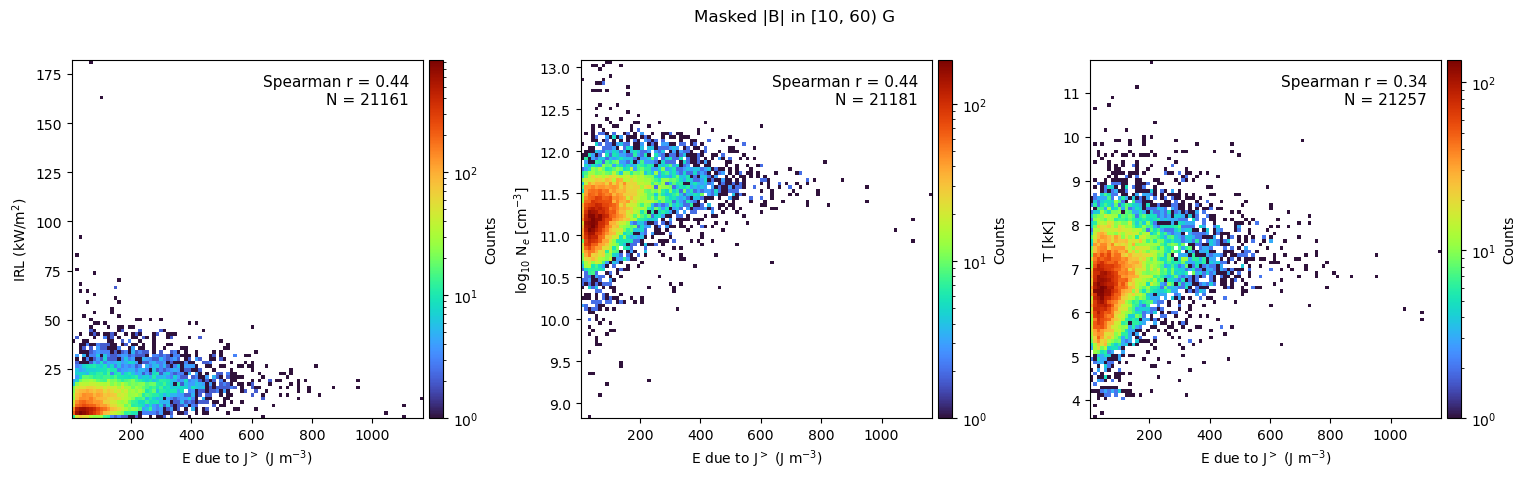

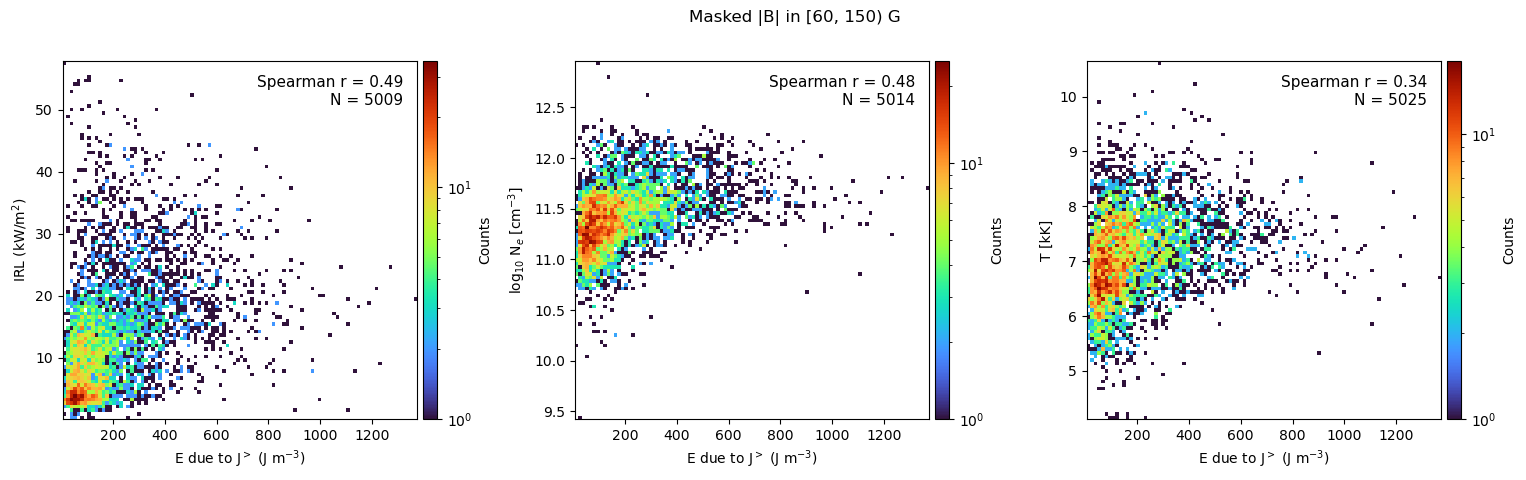

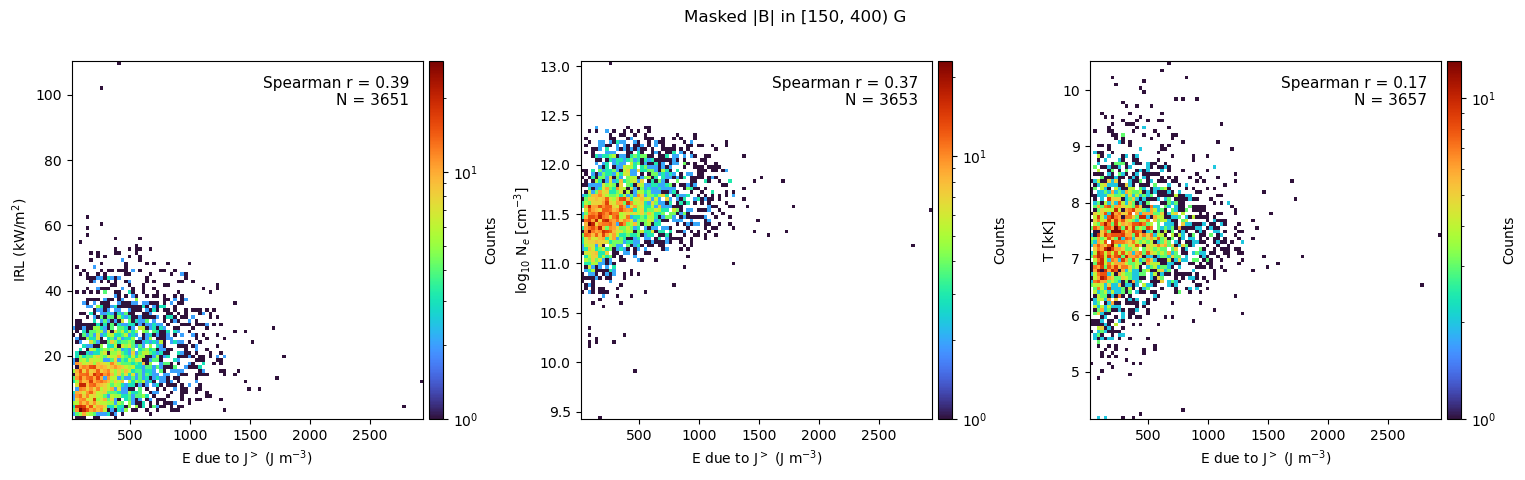

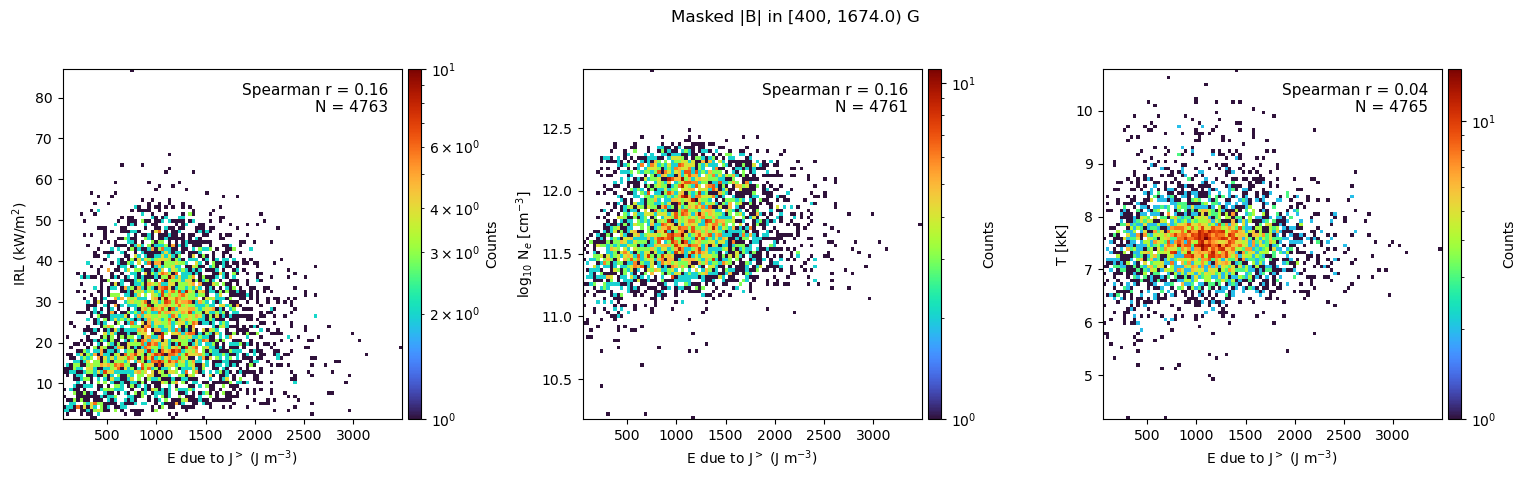

In [136]:
plt.style.use('default')
b_bins = [(10, 60), (60, 150), (150, 400), (400, np.round(np.max(np.abs(B_z_cropped))))]


for low, high in b_bins:
    mask_B = ((np.abs(B_z_cropped) >= low) & (np.abs(B_z_cropped) < high)).astype(float)

    y_list = [mask_B * IRL, mask_B * Ne, mask_B * Temp]
    y_title = [r'IRL (kW/m$^{2}$)', r'log$_{10}$ N$_e$ [cm$^{-3}$]', 'T [kK]']
    x = (E_density_gt * mask_B).flatten()

    fig, ax = plt.subplots(1, len(y_list), figsize=(16, 5), sharex=True)
    ax = np.atleast_1d(ax)

    for yy, (arr, title) in enumerate(zip(y_list, y_title)):
        y = arr.flatten()
        valid = (~np.isnan(x)) & (~np.isnan(y)) & (y > 0)
        x_valid, y_valid = x[valid], y[valid]
        
        if yy == 0:
            y_lim = np.nanpercentile(y_valid, 90)
            ax[yy].set_ylim(top=y_lim)


        if len(x_valid) == 0:
            ax[yy].set_visible(False)
            continue

        y_plot = np.log10(y_valid) if yy == 1 else y_valid
        rho, _ = spearmanr(x_valid, y_plot)

        hist = ax[yy].hist2d(
            x_valid,
            y_plot,
            bins=100,
            cmap='turbo',
            norm=colors.LogNorm(vmin=1),
        )

        ax[yy].text(
            0.96,
            0.96,
            f"Spearman r = {rho:.2f}\nN = {len(x_valid)}",
            transform=ax[yy].transAxes,
            ha='right',
            va='top',
            fontsize=11,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'),
        )
        ax[yy].set_xlabel(r'E due to J$^{>}$ (J m$^{-3}$)')
        ax[yy].set_ylabel(title)
        # ax[yy].set_title(title.replace('log$_{10}$ ', ''))

        divider = make_axes_locatable(ax[yy])
        cax = divider.append_axes("right", size="4%", pad=0.06)
        cbar = fig.colorbar(hist[-1], cax=cax)
        cbar.set_label('Counts')

    fig.suptitle(f'Masked |B| in [{low}, {high if np.isfinite(high) else "∞"}) G', y=0.95)
    fig.tight_layout(rect=[0, 0, 0.96, 0.94])
    plt.savefig(os.path.join(os.environ['results_dir'],'JPDF_J>_'+format(low)+'.png'),dpi=300,bbox_inches='tight')
    # plt.show()


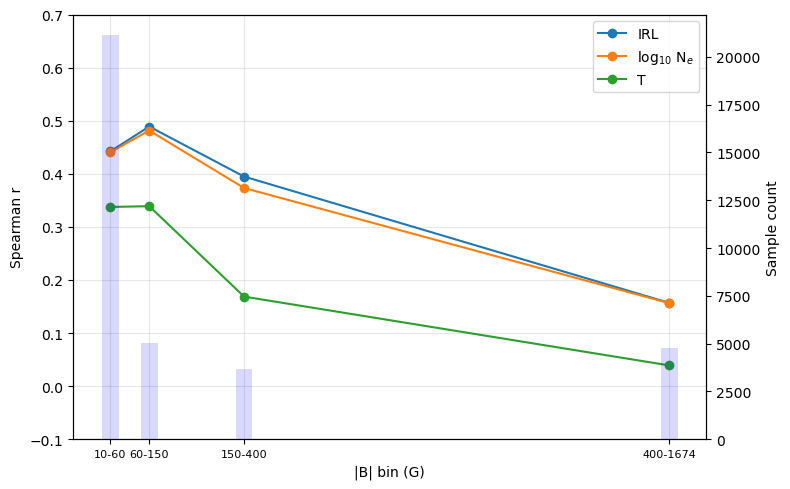

In [ ]:
b_bins = [(10, 60), (60, 150), (150, 400), (400, np.round(np.max(np.abs(B_z_cropped))))]
bin_labels = [f"{low}-{int(high) if np.isfinite(high) else '∞'}" for low, high in b_bins]
bin_centers = np.array([np.mean([low, high if np.isfinite(high) else low * 1.75]) for low, high in b_bins])

rho_irl, rho_ne, rho_temp = [], [], []
counts = []

for low, high in b_bins:
    mask_B = ((np.abs(B_z_cropped) >= low) & (np.abs(B_z_cropped) < high)).astype(float)

    x = (E_density_gt * mask_B).flatten()
    y_IRL = (mask_B * IRL).flatten()
    y_Ne = (mask_B * Ne).flatten()
    y_T = (mask_B * Temp).flatten()

    valid_IRL = (~np.isnan(x)) & (~np.isnan(y_IRL)) & (y_IRL > 0)
    valid_Ne = (~np.isnan(x)) & (~np.isnan(y_Ne)) & (y_Ne > 0)
    valid_T = (~np.isnan(x)) & (~np.isnan(y_T)) & (y_T > 0)

    counts.append(valid_IRL.sum())

    rho_irl.append(spearmanr(x[valid_IRL], y_IRL[valid_IRL]).correlation)
    rho_ne.append(spearmanr(x[valid_Ne], np.log10(y_Ne[valid_Ne])).correlation)
    rho_temp.append(spearmanr(x[valid_T], y_T[valid_T]).correlation)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(bin_centers, rho_irl, '-o', label='IRL', color='tab:blue')
ax.plot(bin_centers, rho_ne, '-o', label=r'log$_{10}$ N$_e$', color='tab:orange')
ax.plot(bin_centers, rho_temp, '-o', label='T', color='tab:green')

ax.set_xticks(bin_centers)
ax.set_xticklabels(bin_labels,fontsize=8)
ax.set_ylim(-0.1, 0.7)
ax.set_xlabel(r'|B| bin (G)')
ax.set_ylabel('Spearman r')
ax.grid(alpha=0.3)
ax.legend()

ax2 = ax.twinx()
ax2.bar(bin_centers, counts, width=30, alpha=0.15, color='blue')
ax2.set_ylabel('Sample count')

fig.tight_layout()

plt.show()


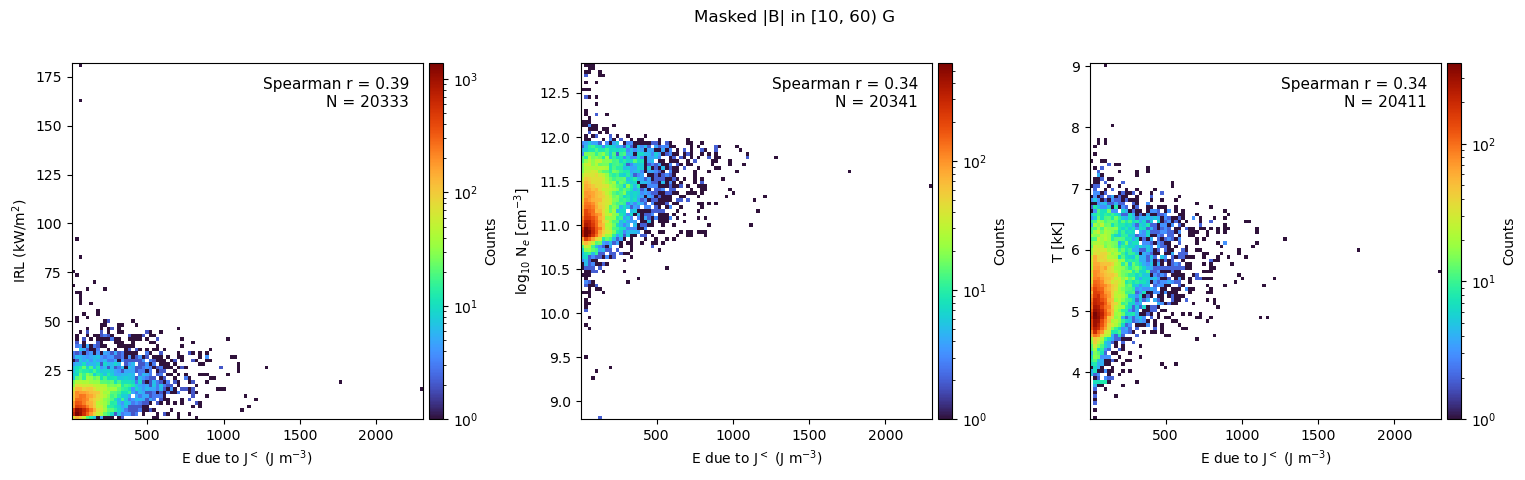

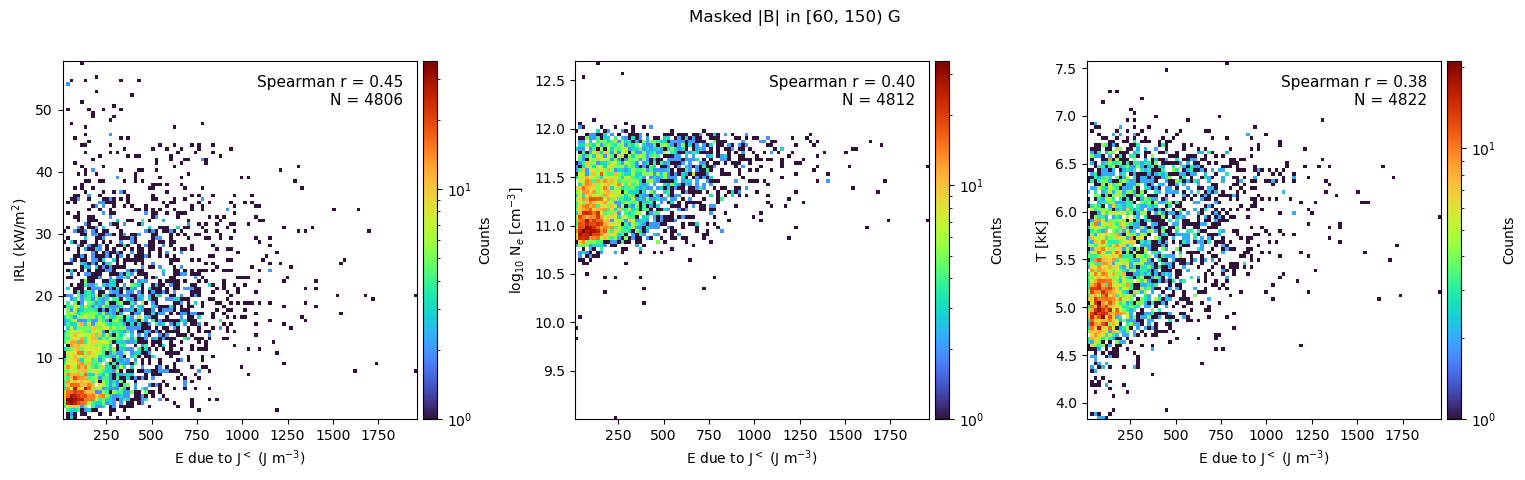

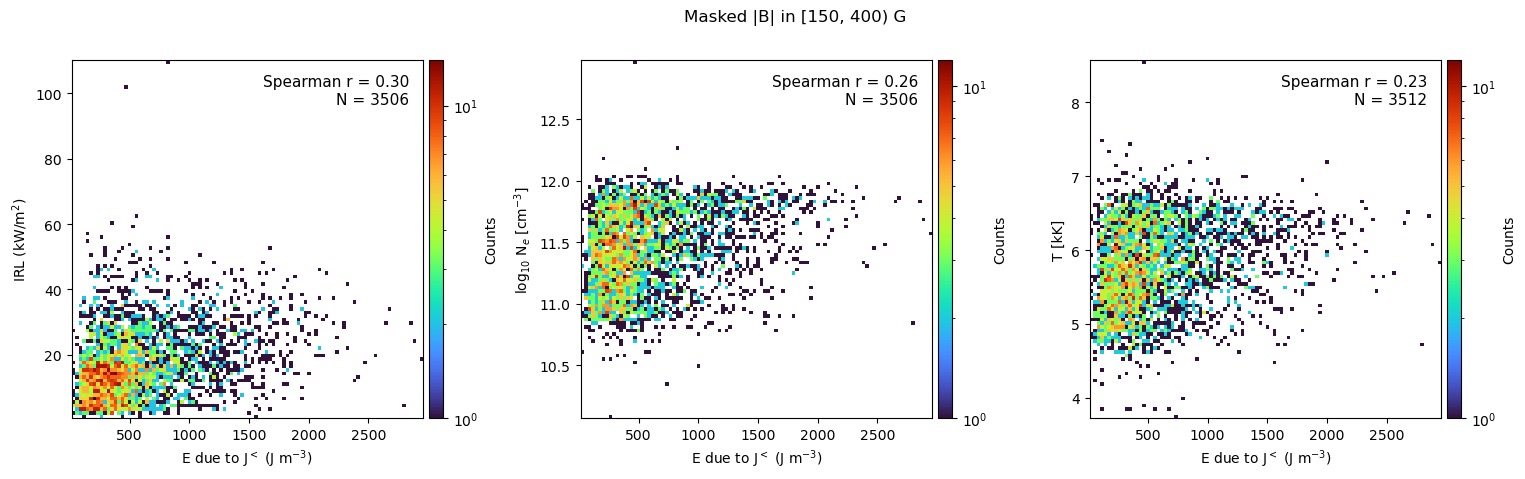

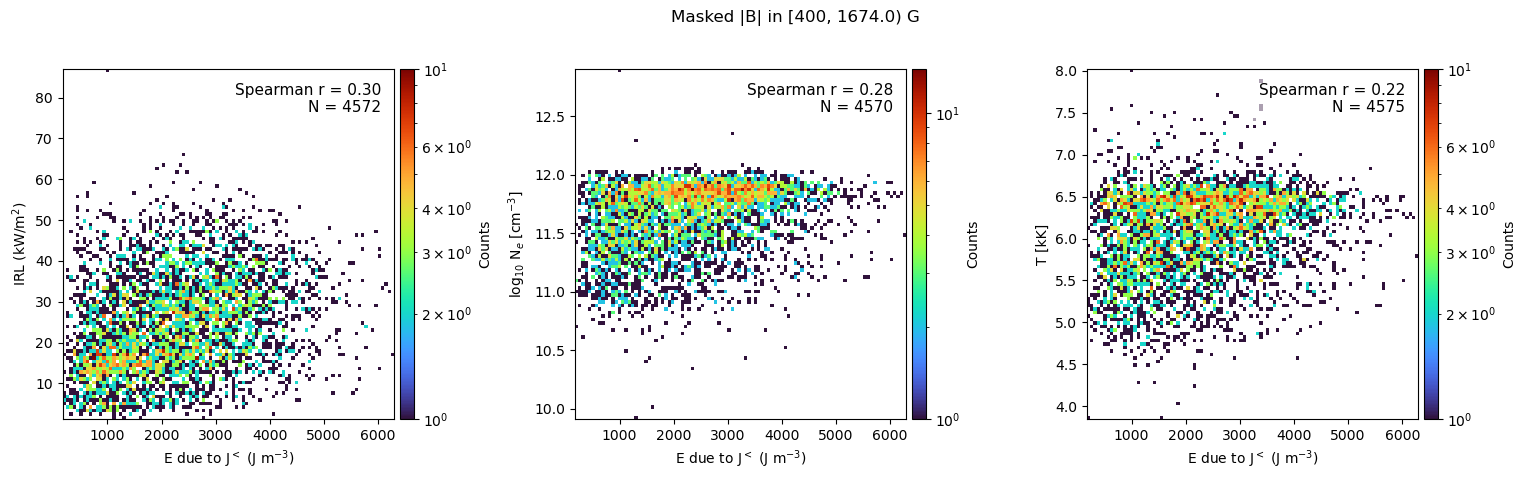

In [20]:
def clip_percentile(x, y, lower=10, upper=70):
    """Trim paired arrays to percentile window."""
    x_lo, x_hi = np.nanpercentile(x, [lower, upper])
    y_lo, y_hi = np.nanpercentile(y, [lower, upper])
    keep = (
        (x >= x_lo) & (x <= x_hi) &
        (y >= y_lo) & (y <= y_hi)
    )
    return x[keep], y[keep]

plt.style.use('default')
b_bins = [(10, 60), (60, 150), (150, 400), (400, np.round(np.max(np.abs(B_z_cropped))))]

for low, high in b_bins:
    mask_B = ((np.abs(B_z_cropped) >= low) & (np.abs(B_z_cropped) < high)).astype(float)

    y_list = [mask_B * IRL, mask_B * Ne, mask_B * Temp]
    y_title = [r'IRL (kW/m$^{2}$)', r'log$_{10}$ N$_e$ [cm$^{-3}$]', 'T [kK]']
    x = (E_density_lt * mask_B).flatten()

    fig, ax = plt.subplots(1, len(y_list), figsize=(16, 5), sharex=True)
    ax = np.atleast_1d(ax)

    for yy, (arr, title) in enumerate(zip(y_list, y_title)):
        y = arr.flatten()
        valid = (~np.isnan(x)) & (~np.isnan(y)) & (y > 0)
        x_valid, y_valid = x[valid], y[valid]

        if yy == 0 and len(y_valid) > 0:
            y_lim = np.nanpercentile(y_valid, 90)
            ax[yy].set_ylim(top=y_lim)

        if len(x_valid) == 0:
            ax[yy].set_visible(False)
            continue

        y_plot = np.log10(y_valid) if yy == 1 else y_valid
        x_trim, y_trim = clip_percentile(x_valid, y_plot, lower=1, upper=99)

        rho, _ = spearmanr(x_trim, y_trim)

        hist = ax[yy].hist2d(
            x_valid,
            y_plot,
            bins=100,
            cmap='turbo',
            norm=colors.LogNorm(vmin=1),
        )

        ax[yy].text(
            0.96,
            0.96,
            f"Spearman r = {rho:.2f}\nN = {len(x_trim)}",
            transform=ax[yy].transAxes,
            ha='right',
            va='top',
            fontsize=11,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'),
        )
        ax[yy].set_xlabel(r'E due to J$^{<}$ (J m$^{-3}$)')
        ax[yy].set_ylabel(title)

        divider = make_axes_locatable(ax[yy])
        cax = divider.append_axes("right", size="4%", pad=0.06)
        cbar = fig.colorbar(hist[-1], cax=cax)
        cbar.set_label('Counts')

    fig.suptitle(f'Masked |B| in [{low}, {high if np.isfinite(high) else "∞"}) G', y=0.95)
    fig.tight_layout(rect=[0, 0, 0.96, 0.94])
    plt.show()


## IRL mask

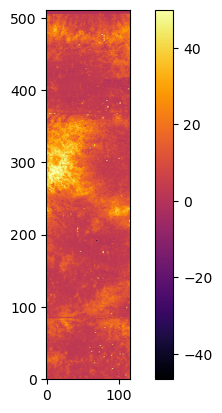

In [113]:
IRL_thresh1 = 0
IRL_thresh2 = 50
# mask_B = np.where(np.abs(IRL) >=IRL_thresh, 1., 0.)
mask_B = ((np.abs(IRL) >= IRL_thresh1) & (np.abs(IRL) <= IRL_thresh2)).astype(float)

plt.imshow((IRL), cmap='inferno',origin='lower', vmax=50)
plt.colorbar()
# plt.contour(mask_B, origin='lower',color='red',levels=[0.5])

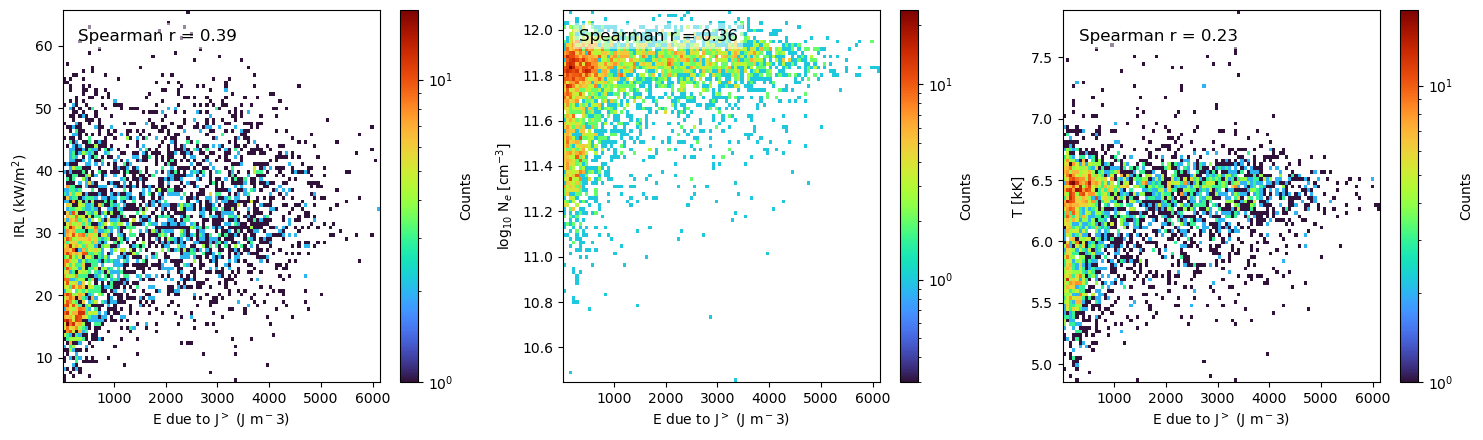

In [120]:
### JPDFs
plt.style.use('default')
# y_list = [mask_B*np.abs(IRL), mask_B*np.abs(Ne), mask_B*np.abs(Temp)]
y_list = [np.abs(IRL[250:350,0:50]), np.abs(Ne[250:350,0:50]), np.abs(Temp[250:350,0:50])]

y_title = [r'IRL (kW/m$^{2}$)', r'log$_{10}$ N$_e$ [cm$^{-3}$]', 'T [kK]']
# x = (E_density_gt*mask_B).flatten()
x = (E_density_lt[250:350,0:50]).flatten()

fig, ax = plt.subplots(ncols = len(y_list), nrows=1, figsize=(15,4.5))
ax.ravel()

for yy in range(len(y_list)):
    y = y_list[yy].flatten()
    mask = (~np.isnan(x)) & (~np.isnan(y)) & (y > 0)
    x_valid = x[mask]
    y_valid = y[mask]
    # Calculate Spearman rank correlation
    if yy == 1:
        rho, pval = spearmanr(x_valid, np.log10(y_valid))
        hist = ax[yy].hist2d(x_valid, np.log10(y_valid), bins=100, cmap='turbo', norm=colors.LogNorm(0.3))
        ax[yy].set_ylabel(y_title[yy])
        min_val = max(np.nanmin(x_valid), np.nanmin(np.log10(y_valid)))
        max_val = min(np.nanmax(x_valid), np.nanmax(np.log10(y_valid)))
        # ax[yy].plot([min_val, max_val], [min_val, max_val], 'w--', lw=2, label='y = x', color='red')
        ax[yy].text(0.05, 0.95, f"Spearman r = {rho:.2f}", transform=ax[yy].transAxes,
                    fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        fig.colorbar(hist[3], label='Counts')

    else:
        # print('fuck')
        rho, pval = spearmanr(x_valid, (y_valid))
        hist = ax[yy].hist2d(x_valid, (y_valid), bins=100, cmap='turbo', norm=colors.LogNorm())
        ax[yy].set_ylabel(y_title[yy])
        min_val = max(np.nanmin(x_valid), np.nanmin(y_valid))
        max_val = min(np.nanmax(x_valid), np.nanmax(y_valid))
        # ax[yy].plot([min_val, max_val], [min_val, max_val], 'w--', lw=2, label='y = x', color='red')
        ax[yy].text(0.05, 0.95, f"Spearman r = {rho:.2f}", transform=ax[yy].transAxes,
                    fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        fig.colorbar(hist[3], label='Counts')

    ax[yy].set_xlabel(r'E due to J$^{>}$ (J m$^-3$)')
fig.tight_layout()
# plt.suptitle('Masked IRL$_{\mathrm{thresh}}$ '+format(IRL_thresh), y=1.01)
plt.show()
    # ax[yy].set_title('2D JPDF')
    


